# Task

The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

# Data

Dataset is here: https://yadi.sk/d/6sjQ8yb_3QkEXM

Description of variables:

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- binary(1 - quite good strength, 0 - not quite good strength) -- Output Variable

# Solution

During implementation of home work №2 I have fitted several classifiers, including RandomForestClassifier and ExtraTreesClassifier to predict binary response variable –  Concrete compressive strengt (is it good or not). All variables, that exist in dataset, like age, cement, water and others (see dataset) were used to build final model. After fitting the model it occurred that these factors influence final variable with different level of importance. So, I’ve calculated and sorted descending these factors into a feature importance list:

In [51]:
important_features

Age                 0.297189
Cement              0.205407
Water               0.123173
CoarseAggregate     0.085130
FineAggregate       0.084642
Superplasticizer    0.078312
BlastFurnaceSlag    0.071452
FlyAsh              0.054696
dtype: float64

Final model looked well on test data and showed accuracy level at 0.88.

Also during this home work I’ve tested how number of trees in random forest influences on final model accuracy. So results can be presented in this plot:

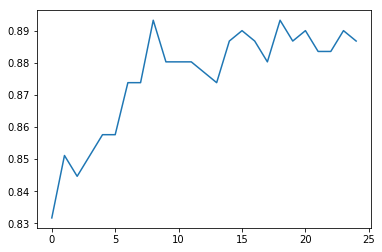

In [52]:
plt.plot(trees, accuracy)

As it shows, even one tree is able to show accuracy at a good level. So, this data can be described even with one tree. But, on the other hand, it is clear, that after adding some more trees (>5) final accuracy increases a bit, making model able to predict data in a better way.

# Code

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
rnd_state = 55324

In [39]:
df = pd.read_csv("Concrete_Data_coursera.csv", sep=";")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,42492.0,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,42492.0,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1


In [40]:
df.shape

(1027, 9)

In [41]:
df.dropna().shape

(1027, 9)

We see that there are no omissions in the data. 

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1027.0,280.950925,104.571575,102.00,192.0,272.80,350.00,540.0
BlastFurnaceSlag,1027.0,74.060419,86.351035,0.00,0.0,22.00,143.00,359.4
FlyAsh,1027.0,53.879017,63.834788,0.00,0.0,0.00,118.27,200.1
Water,1027.0,181.587488,21.375824,121.75,164.9,185.00,192.00,247.0
Superplasticizer,1027.0,15588.141008,18042.839610,0.00,0.0,13.93,33512.00,46235.0
CoarseAggregate,1027.0,972.907644,77.863637,801.00,932.0,968.00,1029.40,1145.0
FineAggregate,1027.0,773.971032,79.961308,594.00,733.5,780.00,824.50,992.6
Age,1027.0,45.713729,63.254967,1.00,7.0,28.00,56.00,365.0
ConcreteCompressiveStrength,1027.0,0.366115,0.481976,0.00,0.0,0.00,1.00,1.0


Split into train test datasets

In [43]:
X = df.drop('ConcreteCompressiveStrength', 1)
y = df['ConcreteCompressiveStrength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3/10, random_state=rnd_state)

print("Predict train shape: ", X_train.shape)
print("Predict test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Predict train shape:  (718, 8)
Predict test shape:  (309, 8)
Target train shape:  (718,)
Target test shape:  (309,)


Fitting RandomForestClassifier

In [44]:
classifier = RandomForestClassifier(n_estimators=25, random_state=RND_STATE)
classifier = classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

Checking model fit quality

In [45]:
print('Confusion matrix:\n', pd.crosstab(y_test,predictions, colnames=['Actual'], rownames=['Predicted'], margins=True))
print('\nAccuracy: ', accuracy_score(y_test,predictions))

Confusion matrix:
 Actual       0    1  All
Predicted               
0          178   14  192
1           21   96  117
All        199  110  309

Accuracy:  0.886731391586


In [46]:
important_features = pd.Series(data=classifier.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Age                 0.297189
Cement              0.205407
Water               0.123173
CoarseAggregate     0.085130
FineAggregate       0.084642
Superplasticizer    0.078312
BlastFurnaceSlag    0.071452
FlyAsh              0.054696
dtype: float64

Fitting ExtraTreesClassifier

In [47]:
model = ExtraTreesClassifier(random_state=rnd_state)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=55324,
           verbose=0, warm_start=False)

Printing feature importances and checking relation between number of trees and accuracy of prediction

In [48]:
print('Feature importances:\n', model.feature_importances_)

Feature importances:
 [ 0.15445776  0.07624038  0.05292166  0.14238313  0.09942216  0.07433806
  0.07748159  0.32275526]


Relation check:

In [49]:
trees = range(25)
accuracy = np.zeros(25)
for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx + 1, random_state=rnd_state)
    classifier = classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy[idx] = accuracy_score(y_test, predictions)

Plotting results:

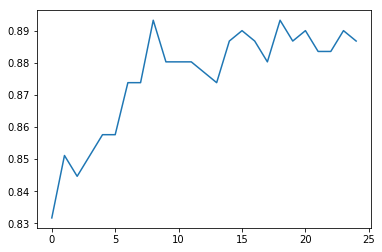

In [50]:
plt.cla()
plt.plot(trees, accuracy)
plt.show()